# Assignment 1

#### Group 30:

Aleksandar Lukic, s19

Clara Mejlhede Lorenzen, s180350

Julia Katarzyna Zalewska, s24

## Part 1: Exploring the friendship paradox.

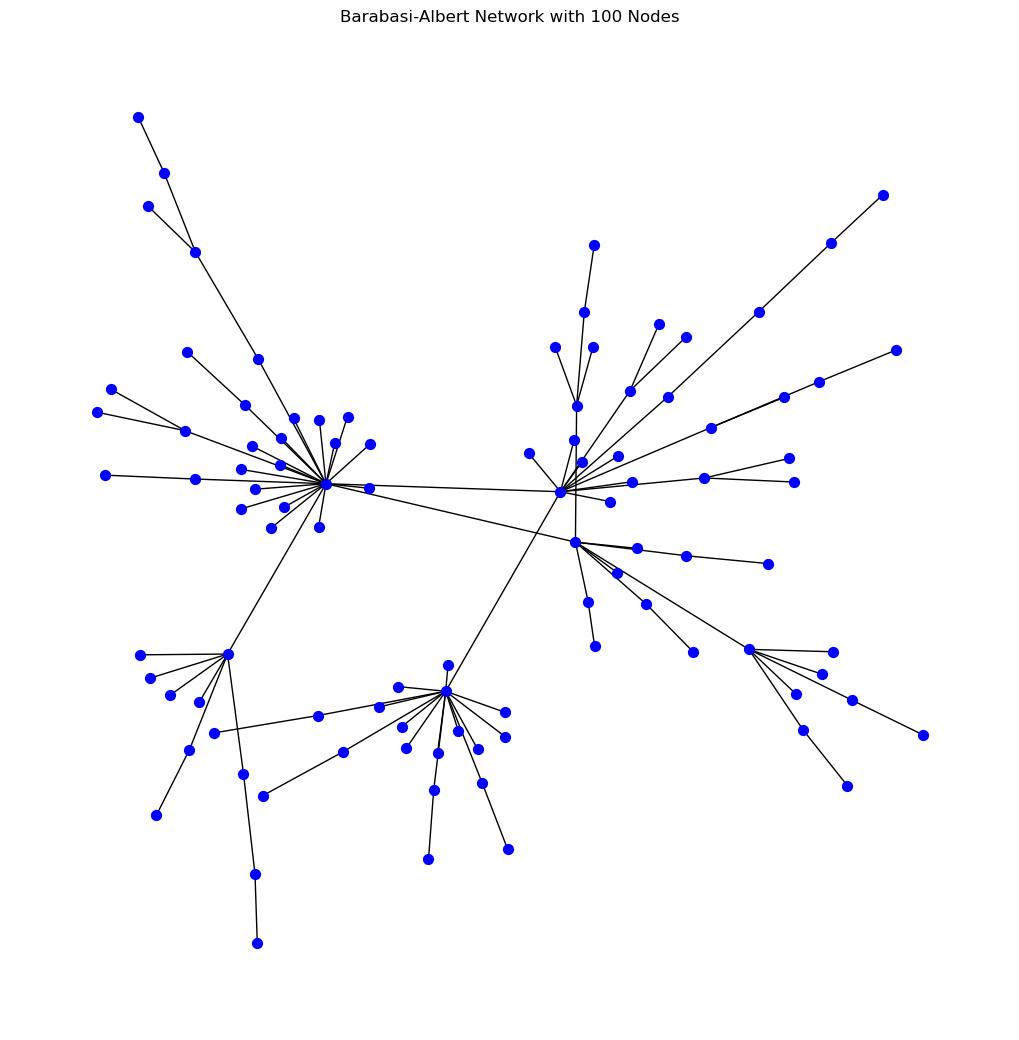

Maximum Degree: 141
Minimum Degree: 1


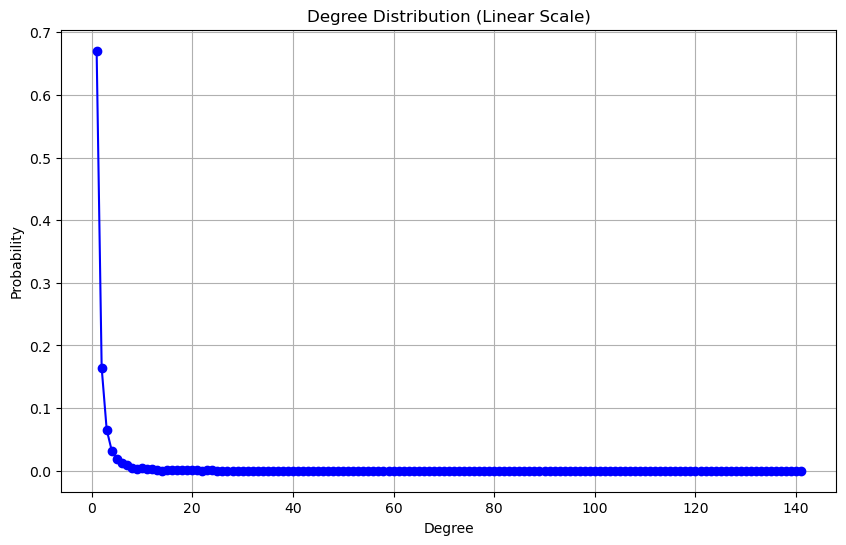

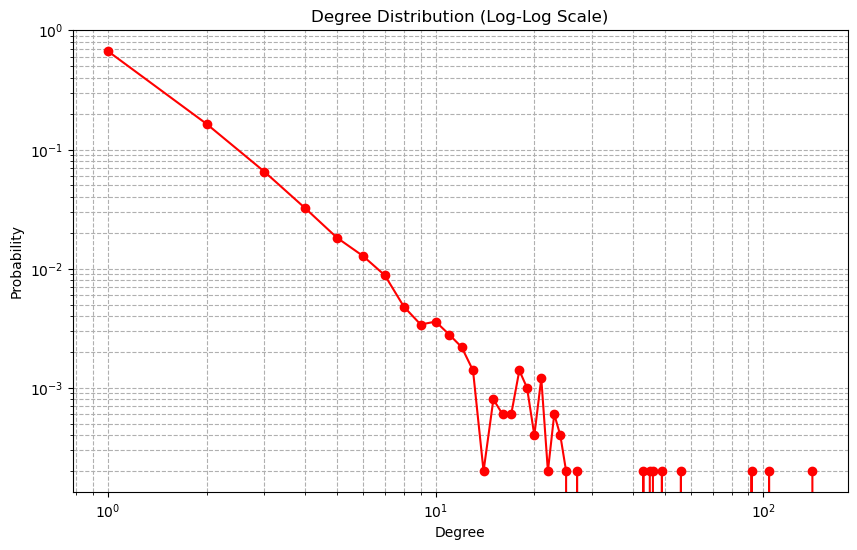

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# Create an initial graph with a single link (connecting 0 and 1)
G = nx.Graph()
G.add_edge(0, 1)

# Add nodes, connecting each to the existing nodes with probability proportional to their degree
def add_node_with_preferential_attachment(G, new_node):
    
    degrees = [node for node, degree in G.degree() for _ in range(degree)]
    
    # attach the new node to existing node
    chosen_node = random.choice(degrees)
    G.add_edge(new_node, chosen_node)

# Keep going until you have a 100 node network.
for i in range(2, 100):
    add_node_with_preferential_attachment(G, i)

# Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=50, node_color='blue', with_labels=False)
plt.title('Barabasi-Albert Network with 100 Nodes')
plt.show()

# Add more nodes until you have a 5000 node network.
for i in range(100, 5000):
    add_node_with_preferential_attachment(G, i)

# What's the maximum and minimum degree?
degrees = [degree for node, degree in G.degree()]
max_degree = max(degrees)
min_degree = min(degrees)

print(f"Maximum Degree: {max_degree}")
print(f"Minimum Degree: {min_degree}")

# Bin the degree distribution using numpy.histogram.
hist, bin_edges = np.histogram(degrees, bins=range(min_degree, max_degree + 2), density=True)

# Plot the distribution in linear 
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], hist, 'b-', marker='o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (Linear Scale)')
plt.grid(True)
plt.show()

# Plot the distribution in log-log axes.
plt.figure(figsize=(10, 6))
plt.loglog(bin_edges[:-1], hist, 'r-', marker='o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (Log-Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

#### The friendship paradox in BA networks

       Pick a node i at random (e.g. use random.choice). Find its degree.

In [3]:
# Find random node i 
random_node = random.choice(list(G.nodes))

# Find its degree
node_degree = G.degree[random_node]
print(f"Degree of node_i {random_node}: {node_degree}")

Degree of node_i 2073: 1


        Find i's neighbors. And calculate their average degree.

In [4]:
# Find neighbors and their degrees
neighbors = list(G.neighbors(random_node))
neighbor_degrees = [G.degree[neighbor] for neighbor in neighbors]

# Calculate neighbors_degree 
if len(neighbor_degrees) > 0:
    neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
else:
    neighbor_degree = 0

print(f"Degree of neighbor_i {random_node}: {neighbor_degree}")

Degree of neighbor_i 2073: 13.0


        Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.

In [5]:
if node_degree < neighbor_degree:
    print("It is true, i's friends has more friends than i") 
else:
    print("It is not true, i has more friends than i's friends")

It is true, i's friends has more friends than i


        Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [6]:
t = 0
f = 0

for i in range(1000):
    # Find random node i 
    random_node = random.choice(list(G.nodes))

    # Find its degree
    node_degree = G.degree[random_node]    
    
    # Find neighbors and their degrees
    neighbors = list(G.neighbors(random_node))
    neighbor_degrees = [G.degree[neighbor] for neighbor in neighbors]

    # Calculate neighbors_degree 
    if len(neighbor_degrees) > 0:
        neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
    else:
        neighbor_degree = 0
    
    if node_degree < neighbor_degree:
        t += 1 
    else:
        f += 1

print(f"The friendship paradox is true {t} times and false {f} times out of 1000 times in total")

The friendship paradox is true 860 times and false 140 times out of 1000 times in total


#### The friendship paradox more generally

#### The friendship paradox and the configuration model

#### Growth without preferential attachment

## Part 2: Stats of the Country Music Network